# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [35]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

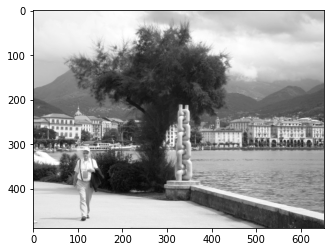

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [37]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

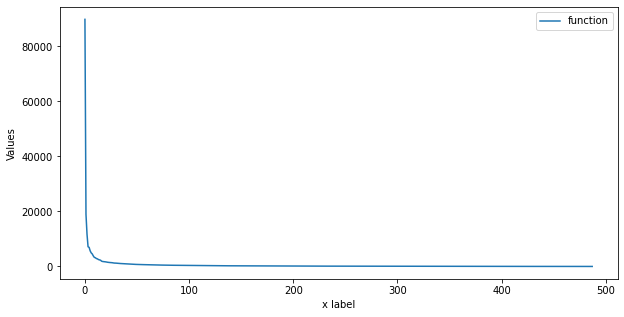

In [38]:
plt.figure(figsize=(10, 5));
plt.plot(S, label = "function")
plt.xlabel('x label')
plt.ylabel('Values')
plt.legend();

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

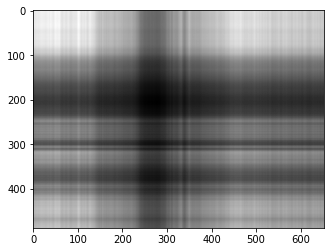

In [39]:
u = U[:, 0:1]
s = np.diag(S)[0:1, 0:1]
vt = VT[0:1, :]
B = u @ s @ vt
imgplot = plt.imshow(B, cmap='gray')

Такая ситуация весьма ожидаема, ведь из графика видно, что существенный вклад в изображение вносит далеко не только первая сигма.


**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

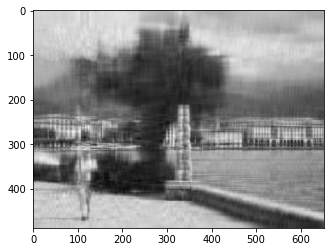

In [40]:
u = U[:, 0:20]
s = np.diag(S)[0:20, 0:20]
vt = VT[0:20, :]
B = u @ s @ vt
imgplot = plt.imshow(B, cmap='gray')


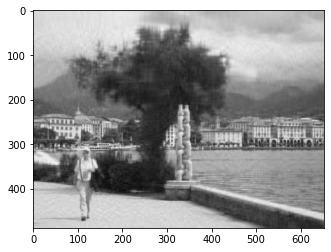

In [41]:
u = U[:, 0:50]
s = np.diag(S)[0:50, 0:50]
vt = VT[0:50, :]
B = u @ s @ vt
imgplot2 = plt.imshow(B, cmap='gray')

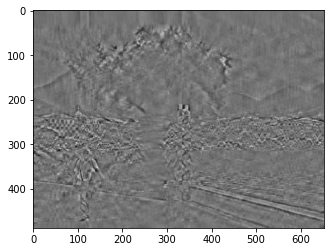

In [42]:
u = U[:, 20:100]
s = np.diag(S)[20:100, 20:100]
vt = VT[20:100, :]
B = u @ s @ vt
imgplot = plt.imshow(B, cmap='gray')

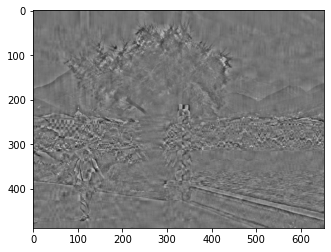

In [43]:
u = U[:, 20:]
s = np.diag(S)[20:, 20:]
vt = VT[20:, :]
B = u @ s @ vt
imgplot = plt.imshow(B, cmap='gray')

Полученные результаты наглядно отображают то, что мы уже видели на графике. Первые значения из сингулярного разложения привносят наибольший вклад, поэтому первые две картинки получились весьма напоминающими оригинал. А последние 2 случая показвают, что значения в хвосте на графике и вправду почти не влияют на полученное изображение. Они, вероятно, лишь более четко вырисовывают какие-то мелкие детали, которые не видны невооруженным глазом. Вывод: первые значения весьма значимы они являются "каркасом" изображения. Последние же влияют лишь на мельчайшие детали.


**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Очевидно, что для идеального изображения понадобиться взять все компоненты, но понятное дело, что тогда мы фактически не воспользуемся svd и сильно проиграем по памяти. Мы уже видели, что первые 50 значений довольно неплохо отображают исходную картинку. Я бы добавил туда еще 50 значений, чтобы мелкие детали были лучше прорисованны. Итого я бы взял первые сто значений, чтобы получить и максимально похожее изображение, и выигрышь по памяти.

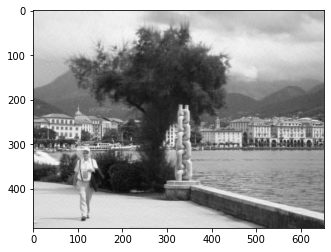

In [44]:
u = U[:, 0:100]
s = np.diag(S)[0:100, 0:100]
vt = VT[0:100, :]
B = u @ s @ vt
imgplot2 = plt.imshow(B, cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [45]:
# посмотрим на исходные размеры изображения
print("Размер U: ", U.shape)
print("Размер S: ", S.shape)
print("Размер VT: ", VT.shape)

Размер U:  (488, 488)
Размер S:  (488,)
Размер VT:  (488, 653)


Из выведенных выше данных получаем m = 488, n = 653

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

получаем выигрышь в $\frac{488 \times 653}{100(488 + 653 + 1)} = 2.79$

То есть теоретически мы выиграли почти в 3 раза.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [46]:
s = S[0:100]
print(U.nbytes + S.nbytes + VT.nbytes)
print(u.nbytes + s.nbytes + vt.nbytes)

4458368
913600


Выигрышь оказался даже немного больше. Где-то  в 5 раз удалось получить выигрышь по памяти.


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

Рассмотрим матрицу $X^TX$. Она симметрична, значит, есть линейного оператора, матрицей которого она является. А значит существует ортонормированный базис из собственных векторов, в котором матрица принимает диагональный вид. Пусть $\left( v_{1}, \ldots, v_n \right)$ - этот базис с собственными значениями $\left( \sigma_{1}^2, \ldots, \sigma_n^2 \right)$. 

Пусть $w$ какой-то n-мерный вектор, $w \in \langle v_{1}, \ldots, v_n \rangle$, так как мы можем думать о $\left( v_{1}, \ldots, v_n \right)$ как о базисе простраства $\mathbb{R}^n$   , то

$$
w = \left( c_{1} \ldots c_n \right) \cdot
\begin {pmatrix}
v_{1} \\
\vdots \\
v_{n} \\
\end {pmatrix}
$$

для некоторого набора коэффициентов $\left( c_{1}, \ldots, c_n \right)$. Тогда $|w|^2 = c_1^2 + \ldots + c_n^2$. 

При этом мы знаем, что 

$$ |Xw|^2 = (Xw)^T\cdot(Xw) = w^TX^TXw = w^T \cdot (X^TXw) $$

Из того, что $\left( v_{1}, \ldots, v_n \right)$ - собственные векторы с собственными значениями $\left( \sigma_{1}, \ldots, \sigma_n \right)$ для $X^TX$ и что $w = c_1v_1 + \ldots + c_nv_n$, получаем:

$$ X^TXw = X^TX (c_1v_1 + \ldots + c_nv_n) = c_1\sigma_1^2v_1 + \ldots + c_n\sigma_n^2v_n$$

Тогда, в силу того что $\left( v_{1}, \ldots, v_n \right)$ - ортонормированный базис, получаем:

$$ |Xw|^2 = w^T \cdot (X^TXw) = c_1^2\sigma_1^2 + \ldots + c_n^2\sigma_n^2$$

Так как $\sigma_1^2$ - наибольшее сингулярное значение, то истинно следующее неравенство: 

$$ |Xw|^2 \leq \sigma_1^2(c_1^2 + \ldots + c_n^2) = \sigma_1^2\cdot |w|^2 => \frac{|Xw|^2}{|w|^2} \leq \sigma_1^2 => \frac{|Xw|}{|w|} \leq \sigma_1 $$

Равенство будет достигаться, если положить $w$ равным собственному вектору, соответсвующему собственному значению $\sigma_1^2$. Действительно, в таком случае $$|Xw|^2 = w^T \cdot (X^TXw) = w^T\cdot\sigma_1^2 w = \sigma_1^2\cdot w^Tw = \sigma_1^2|w|^2 \Rightarrow \frac{|Xw|^2}{|w|^2} = \sigma_1^2$$

Таким образом, я доказал, что
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$$

Второе равенство тривиально, потому что фактически мы просто отномрировали все вектора.

Теперь, мы можем сделать вывод из $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$, что $|Xv| \leq \sigma_1|v|$. Используя сделанный в предыдущем предложении вывод, неравенсво Коши-Буняковского замечаем следующее:

$$ |u^T Xv| \leq |u^T||Xv|\leq|u^T| |\sigma_1v| = \sigma_1|u^T||v| = \sigma_1 $$

Равенство будет достигаться, если положить $v$ равным собственному вектору матрицы $X^TX$, соответсвующему собственному значению $\sigma_1^2$. Действительно, в таком случае $$|Xv|^2 = v^T \cdot (X^TXv) = v^T\cdot\sigma_1^2 v = \sigma_1^2\cdot v^Tv = \sigma_1^2|v|^2 \Rightarrow |Xv| = \sigma_1|v|$$А чтобы неравенсво Коши-Буняковского давало нам равенсво, возьмем $u$ любой нормированный вектор, который пропорционален вектору $Xv$.

В итоге мы получили, что требовалось доказать:

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Если рассматривать данную матрицу А, то будет получаться, что каждый элемент первой строки будет равен 0, так как cos(j) $\forall j\in[1,\ldots,n]$ будем умножаться на sin(0) = 0 => первая строка нулевая. Следующие строки матрицы А будут линейно зависимыми, так как $$a_{(k)}=a_{(z)}\cdot \frac{sin(k-1)}{sin(z-1)} \forall z\in[2,\ldots,n], k\in[1,\ldots,n]$$ \\
В матрице есть одна нулевая строка и (n-1) пропорциональных => строки линейно зависимы => rkA = 1.

Представим А в виде $U\cdot \Sigma \cdot V^T$. Заметим, что
$U = \begin{pmatrix} sin(0)\\ sin(1) \\ sin(2)\\ \ldots \\ sin(n-1)\end{pmatrix}, V = \begin{pmatrix} cos(0)\\ cos(1) \\ cos(2)\\ \ldots \\ cos(n-1)\end{pmatrix}$, тогда у нас это все собирается в достаточно легкий вид, где $U \cdot V^T = \begin{pmatrix} sin(0)\\ sin(1) \\ sin(2)\\ \ldots \\ sin(n-1)\end{pmatrix} \cdot \begin{pmatrix} cos(0) & cos(1) & cos(2)& \ldots & cos(n-1)\end{pmatrix} = A$ (это следует из условия)

rkA = 1 => $\text{rk}\Sigma = 1$ => r = 1 , так как изначально $\Sigma$ была размерности $r \times r$ из условия задачи

Далее нам нужно найти $\sigma_1$, а потом ортонормировать U and V. \\
$|U|=\sqrt{\sum_{i=0}^{n-1}sin(i)^2}=S_u, |V|=\sqrt{\sum_{i=0}^{n-1}cos(i)^2}=S_v$.
Пусть $U=\frac{U}{S_u}, V=\frac{V}{S_v}$, $|U|=|V|=1$, тогда U,V-матрицы с ортогональными столбцами, размера $n\times 1$, так как r = 1.

Тогда можем сделать вывод, что $\Sigma = \begin{pmatrix}\sigma_1\end{pmatrix} = \begin{pmatrix}S_u\cdot S_v\end{pmatrix}$

Тогда, $U\cdot \Sigma \cdot V^T = \begin{pmatrix} \frac{sin(0)}{S_u} \\ \frac{sin(1)}{S_u} \\ \frac{sin(2)}{S_u}\\ \ldots \\ \frac{sin(n-1)}{S_u}\end{pmatrix} \cdot \begin{pmatrix}\ S_u\cdot S_v\end{pmatrix} \cdot \begin{pmatrix} \frac{cos(0)}{S_v} & \frac{cos(1)}{S_v} & \frac{cos(2)}{S_v}& \ldots & \frac{cos(n-1)}{S_v}\end{pmatrix}= А$

Отсюда понятно, что rkA = r = 1. и для матрицы А подходит разложение на U, V(это матрицы с ортогональными столбцами размеров nx1 and 1xn соответственно), $\Sigma$ ровно такое, как показано выше. 

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

1) Докажем, что  $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

В матрице V по столбцам записаны ортонормирванные векторы, поэтому $V^TV = E$. Применим это знание.

Домножим $A = U \Sigma V^T$ на $V$ справа и тогда мы получим:

$$ A = U \Sigma V^T \Rightarrow AV = U \Sigma V^TV \Rightarrow AV = U\Sigma $$

Знаем, что в $\Sigma$ по диагонале записаны сингулярные значения, то есть $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r, 0, \ldots, 0)$. Тогда в матрице $U \Sigma$ первые r столбцов будут ненулевые, а столбцы $r + 1, \ldots, n$ будут нулевые. Но это и означает, что первые r векторов из системы $\left( v_{1}, \ldots, v_n \right)$ отображаются не в ноль, а векторы $\left( v_{r+1}, \ldots, v_n \right)$ отображаются в нулевые векторы. От сюда и следует, что $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$, так как $\left( v_{1}, \ldots, v_n \right)$ - базис всего пространства.

2) Докажем, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$.

Из предыдущего пункта мы знаем, что $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$, а значит образы  векторов $\left( v_{1}, \ldots, v_r \right)$ образуют базис образа. Теперь воспользуемся алгоритмом поиска SVD. Согласно ему после того как мы нашли векторы $\left( v_{1}, \ldots, v_r \right)$ мы $u_i := \frac{1}{\mu_i}Av_i$. Значит $u_i$ - это образ вектора $v_i$ с точностью до ненулевой константы. А значит если воспользоваться формулой $u_i = \frac{1}{\mu_i}Av_i$ для $i \in (1, \ldots, r)$ то получим набор образов векторов $\left( v_{1}, \ldots, v_r \right)$ с точностью до константы. А как мы знаем, этот набор образов и будет базисом образа. Таким образом, $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Пусть $A = U \Phi V^T$ - полное сингулярное разложение матрицы $A$. Пусть $\left( \Phi_{1}, \ldots, \Phi_n \right)$ - сингулярные значения матрицы A, тогда они будут стоть на диагонали матрицы $\Phi$. Матрицы $U$ и $V$ ортогональны, а значит $U^TU = UU^T = V^TV = VV^T = E$.
Тогда, так как столбцы A линейно независимы, то $rkA = n$, а значит и $rk\Phi = n$. Тогда $\Phi^T\Phi$ - квадратная матрица размера $n\times n$ с рагом равным $n$, а значит, она обратима.

$$P = A(A^T A)^{-1} A^T$$

$$P = U \Phi V^T (V \Phi^T U^T U \Phi V^T)^{-1} V \Phi^T U^T$$

$$P = U \Phi V^T (V \Phi^T\Phi V^T)^{-1} V \Phi^T U^T$$

Теперь, так как матрицы $V$, $V^T$ и $\Phi^T\Phi$ обратимы, то можем воспользоваться тем фактом, изученным на линале давным давно, что $(A\cdot B\cdot C)^{-1} = C^{-1}\cdot B^{-1}\cdot A^{-1}$ для квадратных обратимых матриц $A$, $B$, $C$. Значит:

$$P = U \Phi V^T (V \Phi^T\Phi V^T)^{-1} V \Phi^T U^T$$

$$P = U \Phi V^T (V^T)^{-1} (\Phi^T\Phi)^{-1}V^{-1} V \Phi^T U^T$$

$$P = U \Phi (\Phi^T\Phi)^{-1}\Phi^T U^T$$

Рассмотрим матрицу $\Phi (\Phi^T \Phi)^{-1} \Phi^T$.
\begin{equation*}
\Phi^T \Phi = \left(
\begin{array}{cccc}
\Phi_{1} & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & \Phi_{2} & \ldots & 0 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \ddots  & \vdots  & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & \Phi_{n} & \ldots & 0 & 0 & 0
\end{array}
\right) \left(
\begin{array}{cccc}
\Phi_{1} & 0 & \ldots & 0\\
0 & \Phi_{2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \Phi_{n}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) =
\left(
\begin{array}{cccc}
\Phi_{1}^2 & 0 & \ldots & 0\\
0 & \Phi_{2}^2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \Phi_{n}^2\\
\end{array}
\right) 
\end{equation*} 


\begin{equation*}
(\Phi^T \Phi)^{-1} =  
\left(
\begin{array}{cccc}
\Phi_{1}^{-2} & 0 & \ldots & 0\\
0 & \Phi_{2}^{-2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \Phi_{n}^{-2}\\
\end{array}
\right) 
\end{equation*} 


\begin{equation*}
\Phi (\Phi^T \Phi)^{-1} = \left(
\begin{array}{cccc}
\Phi_{1} & 0 & \ldots & 0\\
0 & \Phi_{2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \Phi_{n}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) 
\left(
\begin{array}{cccc}
\Phi_{1}^{-2} & 0 & \ldots & 0\\
0 & \Phi_{2}^{-2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \Phi_{n}^{-2}\\
\end{array}
\right) = \left(
\begin{array}{cccc}
\Phi_{1}^{-1} & 0 & \ldots & 0 \\
0 & \Phi_{2}^{-1} & \ldots & 0 \\
\vdots & \vdots & \ddots  & \vdots\\
0 & 0 & \ldots & \Phi_{n}^{-1}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right)
\end{equation*} 


\begin{equation*}
\Phi (\Phi^T \Phi)^{-1} \Phi^T = \left(
\begin{array}{cccc}
\Phi_{1}^{-1} & 0 & \ldots & 0 \\
0 & \Phi_{2}^{-1} & \ldots & 0 \\
\vdots & \vdots & \ddots  & \vdots\\
0 & 0 & \ldots & \Phi_{n}^{-1}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) \left(
\begin{array}{cccc}
\Phi_{1} & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & \Phi_{2} & \ldots & 0 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \ddots  & \vdots  & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & \Phi_{n} & \ldots & 0 & 0 & 0
\end{array}
\right) = \left(
\begin{array}{cccc}
1 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & 1 & \ldots & 0 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \ldots  & \vdots & \ldots & \vdots & \vdots  & \vdots\\
0 & 0 & \ldots & 1 & \ldots & 0 & 0 & 0\\
0 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \ldots & \vdots & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & 0 &\ldots & 0 & 0 & 0\\
\end{array}
\right)
\end{equation*} 

Получили матрицу размера  $m \times m$ с неубывающими элементами на диагонали (единиц на диагонали $n$ штук).

Значит, матрица $\Sigma$ из искомого сингулярного разложения матрицы $P = U\Sigma V^T$ будет равна $\Phi (\Phi^T \Phi)^{-1} \Phi^T$ и иметь вид, показанный чуть выше. 

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


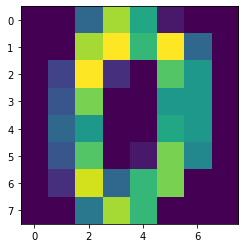

In [47]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [48]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

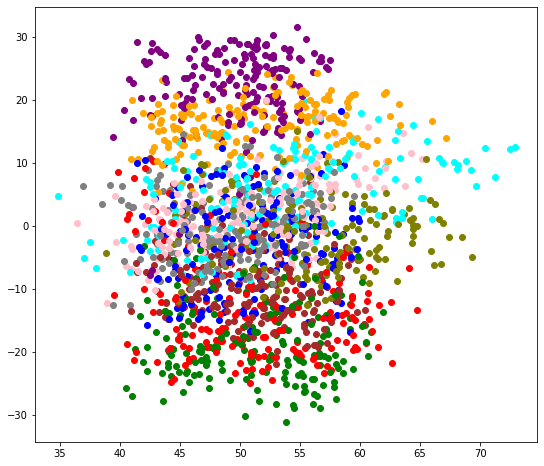

In [49]:
colors = np.array(['pink','cyan','brown','green','purple','blue','orange','grey','olive','red'])
US = (U @ np.diag(S))[:, [0,1]]
plt.figure(figsize = (9,8))
for i in range(US.shape[0]):
    plt.scatter(US[i, 0], US[i, 1] , color = colors[digits.target[i]])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

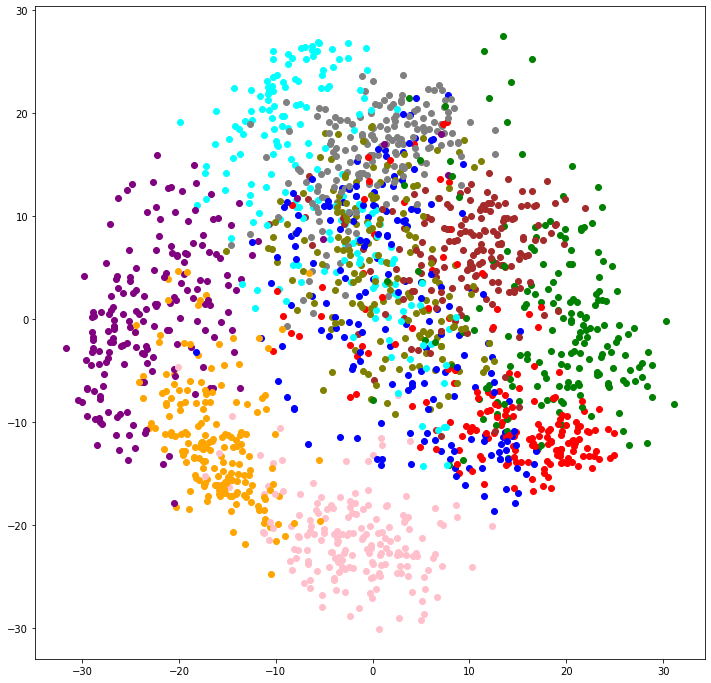

In [50]:
data = digits.data
for j in range(data[0].shape[0]):
    data[:,j] -= np.average(data[:,j])

U_new, S_new, VT_new = svd(data, full_matrices=False)

US_new = (U_new @ np.diag(S_new))[:, [0,1]]

plt.figure(figsize = (12,12))
colors = np.array(['pink','cyan','brown','green','purple','blue','orange','grey','olive','red'])
for j in range(US_new.shape[0]):
    plt.scatter(US_new[j, 0], US_new[j, 1] , color = colors[digits.target[j]])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Проанализировав полученные графики, нетрудно заметить, что в первом случае точки расположены в непонятном, перемешанном виде. Во втором же случае точки расположены симметрично относительно начала координат. Так же можно заметить, что точки одного цвета расположены близко друг к другу, пачками. Еще во втором случае точки по модулю не превосходят 30, это хорошо, так как в таком случае легче зщаметить зависимость расположения точек.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/moUles/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [51]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [52]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

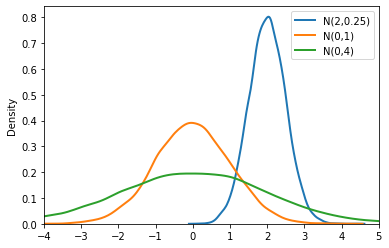

In [53]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Phi\subseteq\mathbb{R}^n$, то

$$P(X\in\Phi) = \int\limits_{\Phi}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c $$
$$ \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \ln(c) $$
$$ \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}+\ln e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \ln(c) $$ 


Так как $\Sigma$ и $n$ зафиксированы, значит $\ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}$ является константой. Положим $c' := \ln(c) - \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}$ и это константа, которая, очевидно, меньше нуля. Тогда:

$$\ln e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c'$$
$$ -\frac12(x - a)^T\Sigma^{-1}(x - a) = c' $$

Как мы знаем, ковариационная матрица положительно определена, значит существует базис, в котором она диагональна с положительными элементами на диагонали. Положим, что $\Sigma' = diag(\lambda_1^2, \ldots, \lambda_n^2)$ в этом базисе. Значит $\Sigma'^{-1} = diag(\frac{1}{\lambda_1^2}, \ldots, \frac{1}{\lambda_n^2})$. Тогда:


$$ -\frac12(x - a)^T\Sigma'^{-1}(x - a) =  -\frac{1}{2}(\frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2}) = c'$$
$$ \frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2} = -2c' $$

Так $c'$ меньше нуля, значит $-2c'$ - больше. Положим $c''^2 = -2c'$ и поделим обе части на $c''^2$:

$$ \frac{(x_1 - a_1)^2}{\lambda_1^2c''^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2c''^2} = 1 $$

А это и есть уравнение эллиипсоида.

**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

Как мы знаем, ковариационная матрица положительно определена, значит существует базис, в котором она диагональна с положительными элементами на диагонали. Положим, что $\Sigma' = diag(\lambda_1^2, \ldots, \lambda_n^2)$ в этом базисе. Значит $\Sigma'^{-1} = diag(\frac{1}{\lambda_1^2}, \ldots, \frac{1}{\lambda_n^2})$. Значит в этом базисе:

$$ -\frac12(x - a)^T\Sigma'^{-1}(x - a) =  -\frac{1}{2}\left(\frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2}\right)$$

Положим $\mu_i := \frac{(x_i - a_i)^2}{\lambda_i^2}$. Ясно, что это будет одномерная составляющая. 

Выпишем функцию плотности многомерного распределния в этом базисе, подставим введенные обозначения и воспользуемся свойством $e^{a+b} = e^a\cdot e^b$:

$$ p(x) = \frac1{(2\pi)^{n/2}|\Sigma'|^{1/2}}e^{-\frac12(x - a)^T\Sigma'^{-1}(x - a)} = \frac1{(2\pi)^{n/2}(\lambda_1^2 \cdot \ldots \cdot \lambda_n^2)^{1/2}}e^{-\frac12(\mu_1+\ldots+\mu_n)} = $$

$$= \frac1{(2\pi)^{1/2}(\lambda_1^2)^{1/2}}e^{-\frac12\mu_1}\cdot\ldots\cdot\frac1{(2\pi)^{1/2}(\lambda_n^2)^{1/2}}e^{-\frac12\mu_n}=$$

$$ = \frac1{(2\pi)^{1/2}(\lambda_1^2)^{1/2}}e^{-\frac12\frac{(x_1 - a_1)^2}{\lambda_1^2}}\cdot\ldots\cdot\frac1{(2\pi)^{1/2}(\lambda_n^2)^{1/2}}e^{-\frac12\frac{(x_n - a_n)^2}{\lambda_n^2}} = $$

$$ = \frac1{\sqrt{2\pi\lambda_1^2}}e^{-\frac{(x_1 - a_1)^2}{2\lambda_1^2}}\cdot\ldots\cdot\frac1{\sqrt{2\pi\lambda_n^2}}e^{-\frac{(x_n - a_n)^2}{2\lambda_n^2}} $$



А это и есть представление функции плотности многомерного нормального распределения в виде произведения одномерных нормальных плотностей.

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


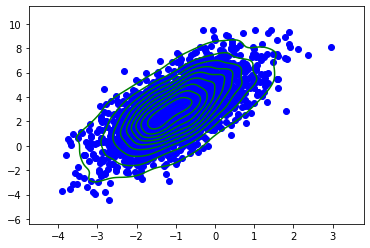

In [63]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='blue')
sns.kdeplot(s[:,0], s[:,1], shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [64]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 's'
  **contour_kws,


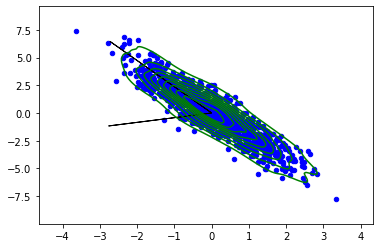

In [65]:
xU, xS, xVT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='blue', s = 20)
sns.kdeplot(X[:,0], X[:,1], shade=False, color='g', s = 20)

plt.arrow(0, 0, 7 * xVT[0, 0], 7 * xVT[0, 1])
plt.arrow(0, 0, 3 * xVT[1, 0], 3 * xVT[1, 1])

plt.show()

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$$\chi(\lambda) = (1 - \lambda) \cdot ( 5 - \lambda) - 4 = \lambda^2 - 6\lambda + 1 $$ 

Собственные значения: 
$\lambda_{1} = 3 + \sqrt{8}$ 
$\lambda_{2} = 3 - \sqrt{8}$


Найдём собственные векторы:
Возьмём $\lambda_{1} = 3 + \sqrt{8}$. Пусть $v_{1} = \begin{pmatrix} \alpha_1\\\alpha_2\end{pmatrix}$ собственный вектор, тогда


$$ \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} \cdot \begin{pmatrix} \alpha_1\\\alpha_2\end{pmatrix} = \begin{pmatrix} \lambda_{1}\alpha_1\\\lambda_{1}\alpha_2\end{pmatrix}
$$


$$ \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} \cdot \begin{pmatrix} \alpha_1\\\alpha_2\end{pmatrix} - \begin{pmatrix} \lambda_{1}\alpha_1\\\lambda_{1}\alpha_2\end{pmatrix} = 0
$$

$$ \begin{pmatrix}
\alpha_1(1-\lambda_1) - 2\alpha_2 \\ -2\alpha_1 + \alpha_2(5 - \lambda_1)
\end{pmatrix} = 0
$$
Решаем, получаем и нормируем:
$$e_{1} = \frac{1}{\sqrt{4+2\sqrt{2}}}\begin{pmatrix}1+\sqrt{2}\\ 1\end{pmatrix}$$
Аналогично для второго значения:
$$e_{2} = \frac{1}{\sqrt{4-2\sqrt{2}}}\begin{pmatrix}1-\sqrt{2}\\ 1\end{pmatrix}$$

Если домножить эти векторы на -1, то из них будет видно, что они почти совпадают с построенными осями.


Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


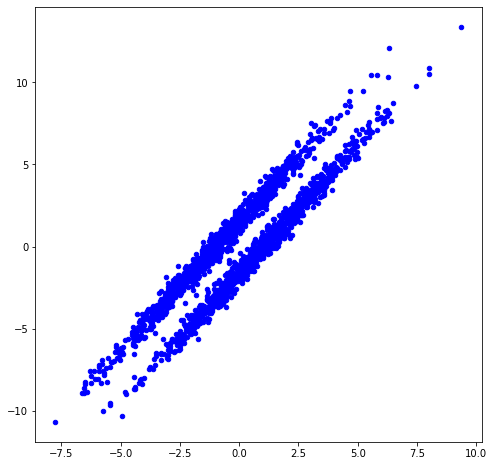

In [66]:
N = 1000
Sigma = np.array([[4.8, 7.65],[7.65,12]])
plt.figure(figsize = (8,8))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
plt.scatter(s1[:,0], s1[:,1], color='blue', s = 20)
plt.scatter(s2[:,0], s2[:,1], color='blue', s = 20)

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


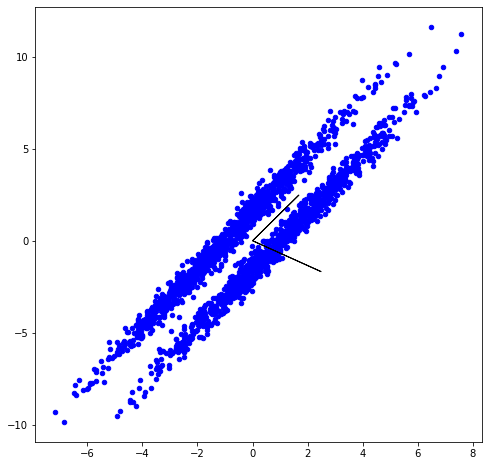

In [67]:
N = 1000
Sigma = np.array([[4.8, 7.65],[7.65,12]])
plt.figure(figsize = (8,8))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
plt.scatter(s1[:,0], s1[:,1], color='blue', s = 20)
plt.scatter(s2[:,0], s2[:,1], color='blue', s = 20)

XX = np.concatenate((s1, s2), axis = 0)
xxU, xxS, xxVT = svd(XX, full_matrices=False)
plt.arrow(0, 0, 3 * xxVT[0, 0], 3 * xxVT[0, 1])
plt.arrow(0, 0, 3 * xxVT[1, 0], 3 * xxVT[1, 1])

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [59]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [60]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

In [61]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ